In [53]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv("C:\\Users\\Akshay\\Downloads\\twitter_dataset_train.csv")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [22]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [23]:
data = data.drop(['id'],axis = 1)

In [28]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

### Null Values

In [30]:
data.isna().sum() #No null Values

label    0
tweet    0
dtype: int64

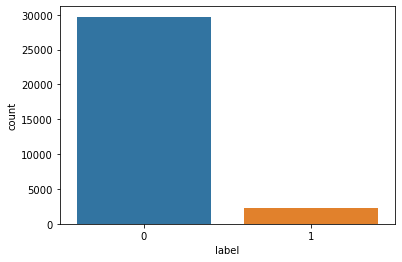

In [35]:
sb.countplot(data.label)


In [37]:
data['length'] = [len(x) for x in data.tweet]

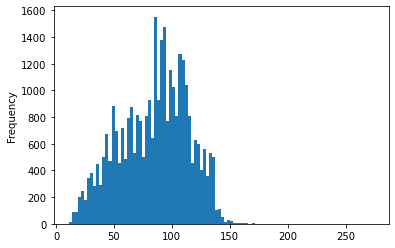

In [41]:
data['length'].plot(bins=100, kind='hist')

#### Average tweet length

In [45]:
data.describe() # Avg length = 84

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [75]:
positive_tweets = data[data['label']==0].tweet
negative_tweets = data[data['label'] == 1].tweet

### Plotting WordCloud

In [51]:
from wordcloud import WordCloud


<Figure size 7200x14400 with 0 Axes>

<Figure size 7200x14400 with 0 Axes>

In [58]:
tweets_as_one_string = "".join(data.tweet.tolist())

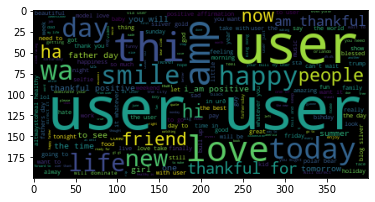

In [69]:

plt.imshow(WordCloud().generate(tweets_as_one_string))

In [77]:
postive_tweets_as_one_string = "".join(positive_tweets)

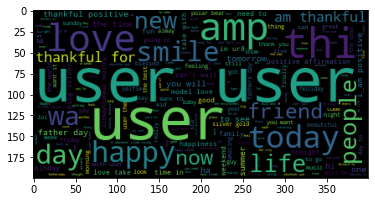

In [78]:
plt.imshow(WordCloud().generate(postive_tweets_as_one_string))

In [79]:
negative_tweets_as_one_string = "".join(negative_tweets)

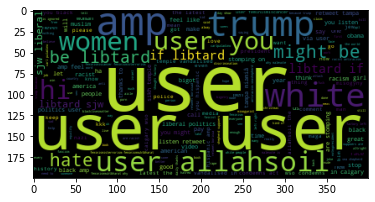

In [81]:
plt.imshow(WordCloud().generate(negative_tweets_as_one_string))

### Removing Punctuation and Stopwords

In [82]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [84]:
import nltk


In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [86]:
from nltk.corpus import stopwords


In [87]:
def clean_tweet(tweet):
    tweet_punc_removed = [char for char in tweet if char not in string.punctuation]
    tweet_punc_removed_join = "".join(tweet_punc_removed)
    tweet_clean = [word for word in tweet_punc_removed_join.split() if word not in stopwords.words('english')]
    return tweet_clean

In [92]:
tweets_cleaned = data['tweet'].apply(clean_tweet)

In [96]:
tweets_cleaned

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urð±, ðð...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuðððððð...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

## Count Vectorizer

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
vectorizer = CountVectorizer(analyzer = clean_tweet,dtype="uint8");
tweets_count_vectorized = vectorizer.fit_transform(data['tweet'])

In [ ]:
print(vectorizer.get_feature_names())

In [105]:
print(tweets_count_vectorized.shape)

(31962, 47386)


In [106]:
tweets = pd.DataFrame(tweets_count_vectorized.toarray())

In [107]:
X=tweets

In [109]:
y=data['label']

In [110]:
y.shape

(31962,)

## Applying Naive Bayes

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [112]:
from sklearn.naive_bayes import MultinomialNB

In [114]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

## Testing 

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

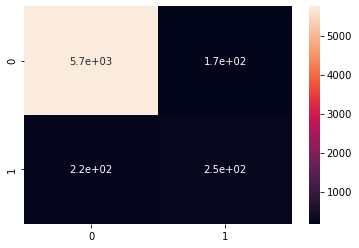

In [119]:
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
sb.heatmap(cm,annot=True)

In [120]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5921
           1       0.59      0.53      0.56       472

    accuracy                           0.94      6393
   macro avg       0.78      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393



## Testing Test Dataset

In [121]:
test_data = pd.read_csv("C:\\Users\\Akshay\\Downloads\\tweets_test.csv")

In [122]:
vectorizer = CountVectorizer(analyzer = clean_tweet,dtype="uint8");
tweets_test_count_vectorized = vectorizer.fit_transform(test_data['tweet'])

In [123]:
tweets = pd.DataFrame(tweets_count_vectorized.toarray())
X=tweets

In [124]:
y_test_predict = NB_classifier.predict(X)

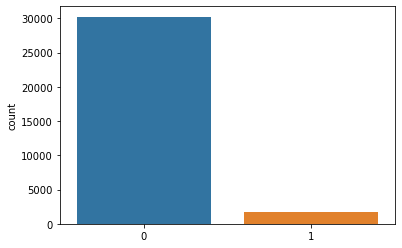

In [155]:
sb.countplot(pd.Series(y_test_predict))